In [3]:
library(rvest)
library(tidyverse)
library(data.table)
library(DT)
library(magrittr)
library(digest)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(stringr)
library(zoo)
library(ggplot2)
library(knitr)
library(textstem)
library(DataCombine)
library(udpipe)
library(lattice)

### Listings for Nursing informatics Faculty (4/22/2020)

In [4]:
listings <- data.frame(title=character(),
                 company=character(), 
                 location=character(), 
                 summary=character(), 
                 link=character(), 
                 description = character(),
                 stringsAsFactors=FALSE) 
for (i in seq(0, 990, 10)){
  url_ds <- paste0('https://www.indeed.com/jobs?q=nursing+informatics+faculty&start=',i)
  var <- read_html(url_ds)
  #job title
  title <-  var %>% 
    html_nodes('#resultsCol .jobtitle') %>%
    html_text() %>%
    str_extract("(\\w+.+)+") 
  
  #company
  company <- var %>% 
    html_nodes('#resultsCol .company') %>%
    html_text() %>%
    str_extract("(\\w+).+") 
  
  #location
  location <- var %>%
    html_nodes('#resultsCol .location') %>%
    html_text() %>%
    str_extract("(\\w+.)+,.[A-Z]{2}")   
  #summary
  summary <- var %>%
    html_nodes('#resultsCol .summary') %>%
    html_text() %>%
    str_extract(".+")
  
  #link
  link <- var %>%
    html_nodes('#resultsCol .jobtitle .turnstileLink, #resultsCol a.jobtitle') %>%
    html_attr('href') 
  link <- paste0("https://www.indeed.com",link)
    
  listings <- rbind(listings, as.data.frame(cbind(title,
                                                  company,
                                                  location,
                                                  summary,
                                                  link)))
}

Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, location, summary, link):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(title, company, locatio

In [5]:
head(listings)

title,company,location,summary,link
Clinical Informatics Nurse,WellSpan Health,"York, PA",3 years experience in clinical nursing.,https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BzvDbU3_nC_3-t5Sla2_qFnhC0vkZhpL19rUg9MzLzGT6JFwi_iOch8Kg7kdIgBTz7tVa0PC7fOqtqdnt7QgU0ZHZ8vowLJMa4SWJiStE4DTExrBrwYppSk0ePypwMQZIrxxrE1DRu8qMc20dfNdKEGbeNacEnAt98bCf-NOqaUWTP2lEHkJVZlMR2900UmLKg1q5YDAbFpshRtfWWtiSU7iOBlNCcSa3tfIYXuzODCy_WkwdNE5G-_3hKLPO34-nA-togwFeLQcPY_RMxuoVpAnVlz9aH1MP56tJ0sPmce5uofoGnxcvBU322cxyYLGw2A_vPyTG11hpexL2YuKXfJWLQ3BplDICMlALfhJOreqB88Ow712wsKdTcFwN269xV9ke8LSsCFa316ewhOYVBT4RPfeF_Fg5lWJopNUSISufHY7EpUULfSmCmzF16ZSC6NAqgPpU6a0-1dGIo8f1ei4JGXId7f8KW1gGCT-MEE2dZqLKk6Wi-1bBCReHWuuBzwY91FZIkgay1J-J0QvkF&p=0&fvj=0&vjs=3
"Assistant Dean, Undergraduate Programs",Resurrection University,"Chicago, IL",Leads the undergraduate nursing faculty to innovate the undergraduate nursing curriculum through involvement of internal and external stakeholders and…,https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BHfKhHr14JuZ5c_u6KrO3XKKsRvy7SNFg9XMJvBLJB4_MRCDw0y97PEl_XyCQlLQOFHVR4aR_AuoXF5lLbr98F9Dc4DHfkcLuRroxVFNRITXSnxKxqCMrbz07ekCEAa_19BpsihYFMWp3_m1w8bRkEp8WgeUCprZXEuUX9unToRrHChEeBtWv-slmzdJori92ttxodJfLCA6hrUILNI4OBwlL5pWBM5iP4czGUKueklQiNCcIzHKHC8m6UjAifOZyUl3jOZ5muiJ_ufASfl3Bb_IewaHspby8nSQqYuQf8aH5Qk1bD_XbXCEA-LNJiuIB4Ut3rNB0JBF6wHykmREzXx19PTG5taQXNxv8jV06Rk7GBWQwYzyhclK8SaLW4RKyIIW9YxBRuGcdXHcrh0w-33qa5Jqd-9lv4lS3SHprKTLfMtEENzgJnX3dh26FQ1rM4n62dbpwOR8vKFjoi_nz2OEYcbffwGgXdQO1jI6B4GimlB43nRzHz&p=1&fvj=1&vjs=3
"Adjunct Professor Lecture MSN Nursing, Mercy College Toledo,...",Mercy Health,"Toledo, OH",Experience for at least two years in the practice of nursing as a registered nurse.,https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CSLJ28jiGSvfi0s1c4rEdVLl5K4IndeVCDi6PoSg3DsMk2YYnZmjTjmhrWdRP8WNZHX4-SYqnrrzejXQYnk-TShqp64lov0zMyMc3XtN9Ch6xB7o7cgMT1WP4DOxNVCPBB5j-UXPinuICWJO99AF94pl1W2n4f1B00eGfXxXc43D5KcH6KFja9Orl05KiTQNhVHWpuktQwio85kmWIvTzal84jtK5mEnXRI-_VIT7qkViT2OSN7erKyKf-Hi99k2Yn0hDiU3joK6YdHz15BWz7enfBZNruNU58lTA0iCX8aEC2A2DRerEboo8ikWiu5McJ-5YOB-6R---VPUmRDfv_9su1EGFMRShgy3f8wC36paCBLxS1q_CCDsNX8MMA8nfsnDNQOAjCdy2F1pbhFFEwLFaDYefAibozKAST2X6gWg==&p=2&fvj=0&vjs=3
9 Month Teaching Faculty - Nursing,Northern Virginia Community College,"Springfield, VA",Experience teaching/supervising ADN nursing students in a clinical setting.,https://www.indeed.com/rc/clk?jk=d8e527871587bffe&fccid=2b15774e43d42233&vjs=3
"Faculty, PT - MSN Core (Virtual)",Laureate Education,NA,Part-time (Contributing) nursing faculty members will also work with other faculty as well as administrators in the College.,https://www.indeed.com/rc/clk?jk=a57fa564e92890b9&fccid=9f4bcd5e5ff3b84d&vjs=3
Adjunct Faculty Nursing Program,Olivet College,"Olivet, MI","We are seeking candidates with specializations in content areas such as community health, diversity, health informatics, pharmacology, pathophysiology, and/or…",https://www.indeed.com/rc/clk?jk=28ee6c66ebc10017&fccid=94610d9ee808a57e&vjs=3


In [6]:
#obtain full description for all job postings
listings$description <- sapply(listings$link,function(x)html_text(html_node(read_html(as.character(x)),'.jobsearch-JobComponent-description')))

In [7]:
write.csv(listings,"listings.csv")
dim(listings)

[1] 1342    6

In [8]:
#Removing duplicates
listings2 <- distinct(listings,description,.keep_all = TRUE)
dim(listings2)

[1] 141   6

In [9]:
head(listings2)

title,company,location,summary,link,description


In [10]:
by_title<- listings2 %>% 
  filter(grepl(" prof |professor", title, ignore.case=T) | grepl("instructor|faculty", title, ignore.case=T))

In [11]:
by_title2<- by_title %>% 
  filter(grepl(" Nursing|MSN", title, ignore.case=T) | grepl("DNP|DNSc", title, ignore.case=T)|
         grepl("Informatics|clinical", title, ignore.case=T)| grepl("Nurse", title, ignore.case=T))

In [12]:
print(by_title2$title)

 [1] Adjunct Professor Lecture MSN Nursing, Mercy College Toledo,...
 [2] 9 Month Teaching Faculty - Nursing                             
 [3] Faculty, PT - MSN Core (Virtual)                               
 [4] Adjunct Faculty Nursing Program                                
 [5] Part Time Online Visiting Professors - Doctor of Nursing Pra...
 [6] Faculty, Contributing - DNP/PHD (Virtual)                      
 [7] Part-Time Nursing Faculty, Health Informatics                  
 [8] Clinical Assistant Professor                                   
 [9] Adjunct Nursing Faculty-Undergraduate                          
[10] Part Time Faculty Health Informatics                           
[11] Assistant / Associate Professor in Nursing                     
[12] Jacques Mohr Endowed Professorship in Geriatric Nursing, Sch...
[13] Teaching Professor - Nursing, CNL 998869                       
[14] Assistant Professor - Biobehavioral Nursing & Health Informa...
[15] Assistant or Associate Profes

In [13]:
dim(by_title2)

[1] 30  6

In [14]:
# Combine the jobs together to form a corpus
modi_data <- Corpus(VectorSource(unique(by_title2$description)))

# create list to clean the corpus from junk words
dropwords <- c("and","the","our","that","for","job","postion","are","also","more","has","must","have","should","this", "with","needs","basic","year", "state", "pay", "gender")
dropwords <- c( dropwords, "less", "will", "may", "well", "within", "andor", "insure", "work", "working", "worked", "company","role" )
dropwords <- c( dropwords, "info", "jobabout", "project", "position", "years", "able", "life", "site", "strong", "issues", "duties" )
dropwords <- c( dropwords, "career", "required", "ability", "staff", "ensure")
dropwords <- c(dropwords,"try","windowmosaiconMosaicApiReady","function","belowFullJobDescription","windowmosaiczonedProviderszoneId","windowmosaiclazyFnsp",
                              "return","windowmosaicapiloadProviderp")
dropwords <- c(dropwords,"windowmosaiconmosaicapireadyfunction",
"windowsmosaiclazyfnsp",
"foreachfunctionp",
"providerfiltersfunctionp",
"windowmosaicapiloadproviderp",
"windowmosaiczonedproviderszoneid",
"abovefulljobdescription",
"zoneid",
"var", "providersfilterfunctionp",
"windowmosaiclazyfnsp",
"belowfulljobdescription", "catch")


In [15]:
#Clean the data
modi_data<-tm_map(modi_data,stripWhitespace)
modi_data<-tm_map(modi_data,tolower)
modi_data<-tm_map(modi_data,removeNumbers)
modi_data<-tm_map(modi_data,removePunctuation)
modi_data<-tm_map(modi_data,removeWords, stopwords('english'))
modi_data<-tm_map(modi_data, removeWords, dropwords )

Warning message in tm_map.SimpleCorpus(modi_data, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeWords, dropwords):
"transformation drops documents"

In [16]:
#Make term document Matrix
tdm_modi<-TermDocumentMatrix(modi_data) #Creates a TDM
TDM1<-as.matrix(tdm_modi) #Convert this into a matrix format
v = sort(rowSums(TDM1), decreasing = TRUE) #Gives you the frequencies for every word
head(v, 12)
findFreqTerms(tdm_modi, lowfreq=c(100))


nursing    faculty     health university  providers   research     school 
       267        207        200        151        121        109        106 
  teaching  education   students experience   clinical 
       103        100         93         87         81

[1] "education"  "faculty"    "health"     "nursing"    "providers" 
[6] "research"   "teaching"   "university" "school"

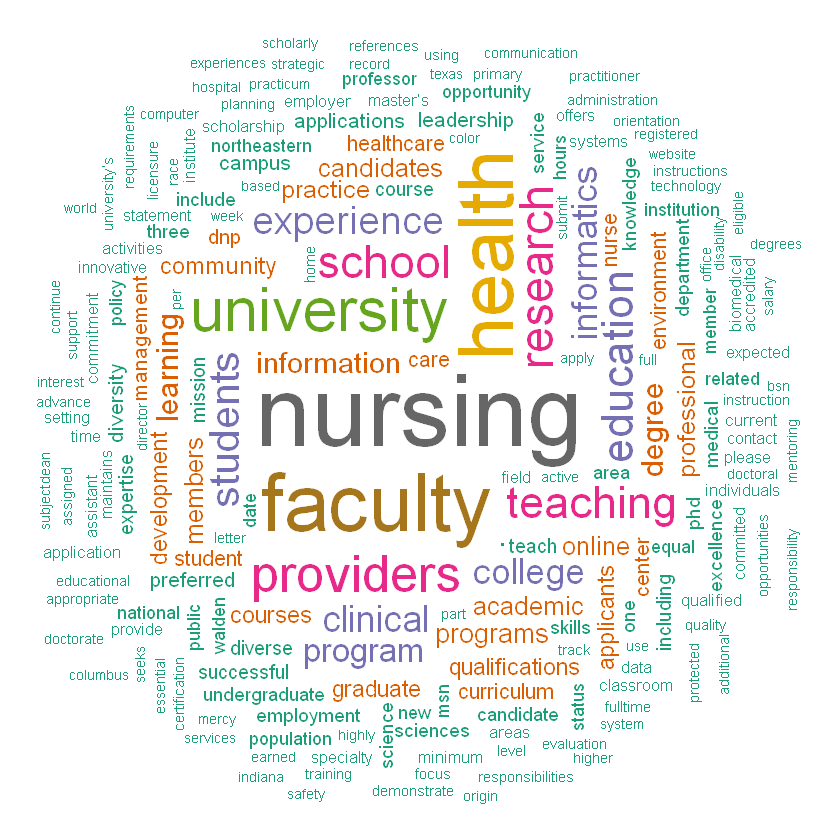

In [52]:
## Plot WordCloud
cloud3 <- wordcloud(modi_data, scale=c(5,0.5), max.words=200, random.order=FALSE, rot.per=0.35, use.r.layout=FALSE, colors=brewer.pal(8, "Dark2"))

In [18]:
doctorate<- by_title %>% 
  filter(grepl("doctorate", description, ignore.case=T)|grepl("phd", description, ignore.case=T)|
    grepl(" edd", description, ignore.case=T)|grepl("DNP", description, ignore.case=T)|
        grepl("dsn", description, ignore.case=T))#|grepl("advanced", description, ignore.case=T))

informatics <- by_title %>% 
  filter(grepl(" informatics|informatics,", description, ignore.case=T))

masters <- by_title %>% 
  filter(grepl(" master|masters", description, ignore.case=T)|grepl("MSN|AGNP", description, ignore.case=T)|
            grepl("FNP|CRNA",description,ignore.case = T))

license <- by_title %>% 
  filter(grepl(" license|licensure", description, ignore.case=T)|grepl("APRN|RN", description, ignore.case=T))

certification <- by_title %>% 
  filter(grepl("certification", description, ignore.case=T)| grepl("certificate", description, ignore.case=T))

Bachelor <- by_title %>% 
  filter(grepl(" Bachelor | Bachelor’s", description, ignore.case=T)|grepl("BSN", description, ignore.case = T))

In [19]:
keywords_pct <- tibble(
  keywords = c("doctorate", "informatics", "masters", "license","certification","Bachelor"), 
  mention_pct = c(round(nrow(doctorate)/nrow(by_title),digits=2), 
                  round(nrow(informatics)/nrow(by_title),digits=2), 
                  round(nrow(masters)/nrow(by_title),digits=2), 
                  round(nrow(license)/nrow(by_title),digits=2),
                  round(nrow(certification)/nrow(by_title),digits=2),
                 round(nrow(Bachelor)/nrow(by_title),digits=2)))


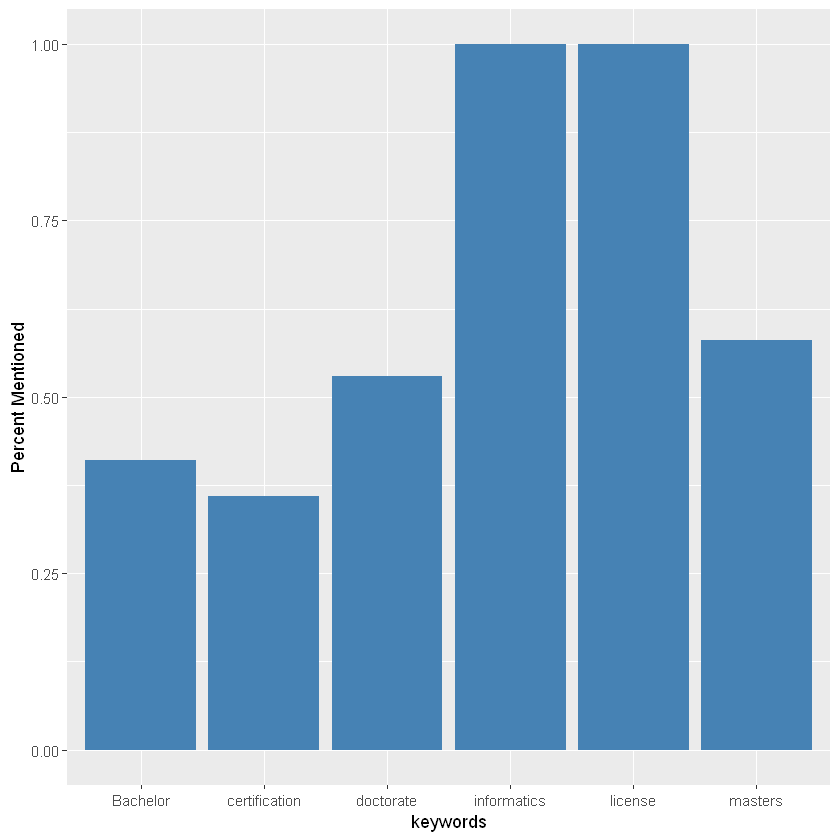

In [54]:
keywords_pct %>% ggplot(aes(x=keywords, y=mention_pct)) + 
  geom_bar(stat="identity", position=position_dodge(), fill="steelblue") + 
  labs(x = "keywords", y = "Percent Mentioned")


one_year<- by_title %>% 
  filter(grepl("one year", description, ignore.case=T)|grepl("1 year", description, ignore.case=T))
two_year<- by_title %>% 
  filter(grepl("two years", description, ignore.case=T)|grepl("2 years", description, ignore.case=T))
three_year<- by_title %>% 
  filter(grepl("three years", description, ignore.case=T)|grepl("3 years", description, ignore.case=T))
five_year<- by_title %>% 
  filter(grepl("five years", description, ignore.case=T)|grepl("5 year", description, ignore.case=T))
ten_year<- by_title %>% 
  filter(grepl("ten year", description, ignore.case=T)|grepl("10 year", description, ignore.case=T))


experience_pct <- tibble(
  keywords = c("one_year", "two_year", "three_year", "five_year","ten_year"), 
  mention_pct = c(round(nrow(one_year)/nrow(by_title),digits=2), 
                  round(nrow(two_year)/nrow(by_title),digits=2), 
                  round(nrow(three_year)/nrow(by_title),digits=2), 
                  round(nrow(five_year)/nrow(by_title),digits=2),
                  round(nrow(ten_year)/nrow(by_title),digits=2)))


experience_pct %>% ggplot(aes(x=keywords, y=mention_pct)) + 
  geom_bar(stat="identity", position=position_dodge(), fill="steelblue") + 
  labs(x = "keywords", y = "Percent Mentioned")

In [21]:
listings.city <- by_title2[,1:3]
listings.state <- listings.city %>% separate(location, c("City","State"), sep = ",")

In [22]:
head(listings.state)

title,company,City,State
"Adjunct Professor Lecture MSN Nursing, Mercy College Toledo,...",Mercy Health,Toledo,OH
9 Month Teaching Faculty - Nursing,Northern Virginia Community College,Springfield,VA
"Faculty, PT - MSN Core (Virtual)",Laureate Education,NA,NA
Adjunct Faculty Nursing Program,Olivet College,Olivet,MI
Part Time Online Visiting Professors - Doctor of Nursing Pra...,Chamberlain College of Nursing,NA,NA
"Faculty, Contributing - DNP/PHD (Virtual)",Laureate Education,NA,NA


In [23]:
locations.city <- as.data.frame(table(listings.city$location))
locations.state <- as.data.frame(table(listings.state$State))
head(locations.city[order(locations.city$Freq,decreasing = TRUE),],10)

,Var1,Freq
2,"Chicago, IL",2
29,"Cedar Rapids, IA",2
42,"Boston, MA",2
1,"Brooklyn, NY",1
3,"Columbus, GA",1
5,"Olivet, MI",1
7,"Springfield, VA",1
8,"Toledo, OH",1
10,"Brunswick, GA",1
11,"Charlestown, MA",1


### Processing text data

In [24]:
#count of data with mention of experience and years or year or month
experience_count <- str_count(by_title2$description,"experience")
years_count <- str_count(by_title2$description,"years|year|months")
exp_years_count <- cbind (row_num=1:length(experience_count),experience_count,years_count) %>% data.frame()

In [25]:
#remove rows with zero occurence for years and experience
exp_years_count <- filter(exp_years_count,experience_count !=0) %>% filter(years_count !=0)

In [26]:
by_title2$row_num <- 1:nrow(by_title2)
by_title3 <- filter(by_title2, row_num %in% exp_years_count$row_num)

In [27]:
#change all columns to character
by_title3[] <- lapply(by_title3, as.character)

In [28]:
teaching<-str_extract_all(by_title3$description,pattern = "([^\\s]+\\s+){5}teaching(\\s+[^\\s]+){5}")

In [29]:
years<- str_extract_all(by_title3$description,pattern = "([^\\s]+\\s+){10}years(\\s+[^\\s]+){10}")

In [30]:
years_experience <- cbind("teaching"= teaching, "years"= years) %>% data.frame()

In [31]:
#write.csv(by_title3,"final_nursing.csv")

In [32]:
#final_df <- read.csv("final_nursing.csv")